### ME 453 HW1 - Template
 Created by TA Li-Wei Shih

For ease of reviewing and grading, we recommend submitting an iPython notebook (*.ipynb) instead of raw Python file (*.py). 

An iPython notebook has multiple advantages over Python script especially for instructional purposes, the most significant of which is the ability to run code by blocks instead of running them altogether, making it much easier to debug. This also enable us to generate interactive tutorials with ease.

Based on these considerations, we strongly recommend, but not necessarily request that you submit the homework codes in form of an iPython notebook, with each section of the problem, i.e. Problem 1 a), 1 b), etc., occupying precisely one block. An example can be found below that you can run by pressing Shift + Enter while highlighting the corresponding block. 

In [2]:
# import package

# If you find some specific function not a built-in function in Python, try to find a suitable package and import it. For example, there is no built-in "mean" function in Python, but you can find it in "numpy" package or "statistics" package.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Problem 1.1
test_data = np.array([[127, 124, 121, 118], [125, 123, 136, 131], [131, 120, 140, 125], [124, 119, 137, 133], [129, 128, 125, 141], [121, 133, 124, 125], [142, 137, 128, 140], [151, 124, 129, 131], [160, 142, 130, 129], [125, 123, 122, 126]]).T.reshape(-1)

# *** Your code here ***
mean = np.mean(test_data)
std_dev = np.std(test_data, ddof=1)

print(f"Sample Average: {mean}")
print(f"Sample Standard Deviation: {std_dev}")

Sample Average: 129.975
Sample Standard Deviation: 8.914084217455962


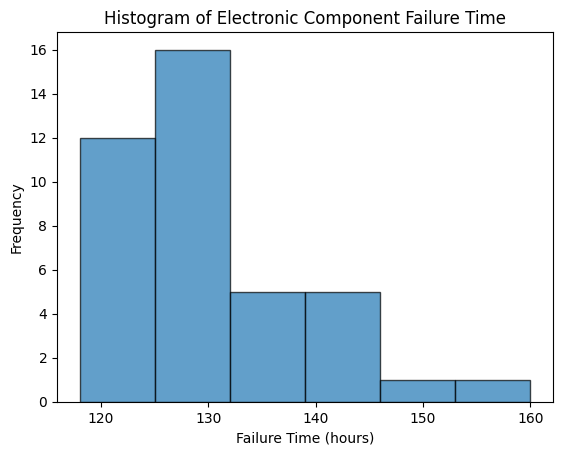

In [4]:
# Problem 1.2
# ...
# plt.hist

# Rule of thumb for number of bins
bins = int(np.sqrt(len(test_data)))

plt.hist(test_data, bins=bins, edgecolor="k", alpha=0.7)
plt.title("Histogram of Electronic Component Failure Time")
plt.xlabel("Failure Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [5]:
# Problem 1.3
# ...
# np.percentile
median = np.median(test_data)
lower_quartile = np.percentile(test_data, 25)
upper_quartile = np.percentile(test_data, 75)

print(f"Sample Median: {median}")
print(f"Lower Quartile: {lower_quartile}")
print(f"Upper Quartile: {upper_quartile}")


Sample Median: 128.0
Lower Quartile: 124.0
Upper Quartile: 133.75


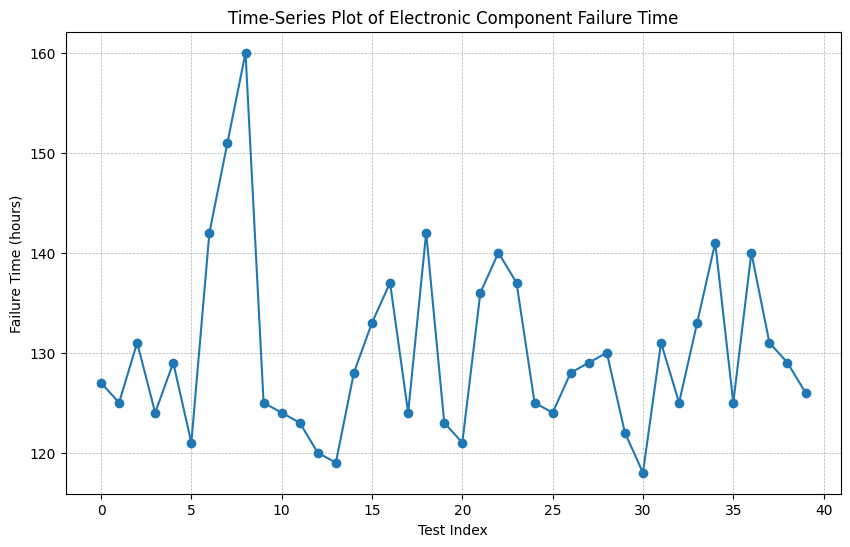

In [6]:
# Problem 1.4
plt.figure(figsize=(10, 6))
plt.plot(test_data, marker="o")
plt.title("Time-Series Plot of Electronic Component Failure Time")
plt.xlabel("Test Index")
plt.ylabel("Failure Time (hours)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Code is not required for problem 2 & 3, but you can still use Python for calculating purpose.

Problem 4 shows how to import csv file to Python and analyze the data.

In [7]:
# Problem 4.1
# Assuming that the .csv file is placed in the same directory (i.e. in the same folder where this Python script live)
welding_df = pd.read_csv('welding_data.csv', header = 0, index_col = None)

# Find all sample which has "Configuration == A"
# welding_df[welding_df.Configuration == "A"]

# Find all sample which has "Configuration == A" and "Feature1 > 0.1"
# welding_df[(welding_df.Configuration == "A") & (welding_df.Feature1 > 0.1)]

# Find all "Configuration"
# welding_df.Configuration

# Convert dataframes as numpy array
data = np.asanyarray(welding_df)

welding_df = pd.read_csv('welding_data.csv', header = 0, index_col = None)
num_welds = welding_df.shape[0]
print(f"Number of welds produced during this period: {num_welds}")
# Once you know how to find the data you want, you can delete the sample code above and start your own code.


Number of welds produced during this period: 90


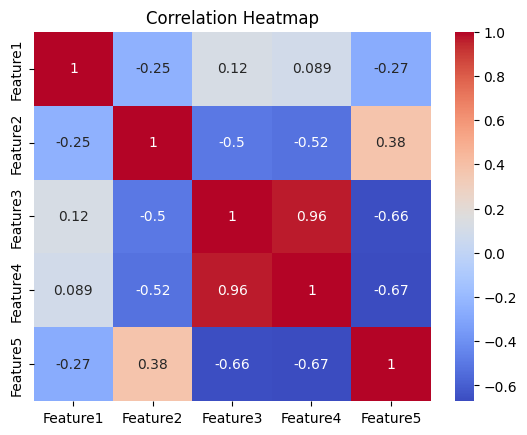

In [8]:
# Homework 1 Problem 4.2
# Search the manual and understand the different between ".loc" and ".iloc"
# '...'.iloc[:,2:].corr(method='pearson')
# To plot the heatmap you can refer to the following link
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

import seaborn as sns

# Assuming df is your dataframe
correlation_matrix = welding_df.iloc[:, 1:].corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

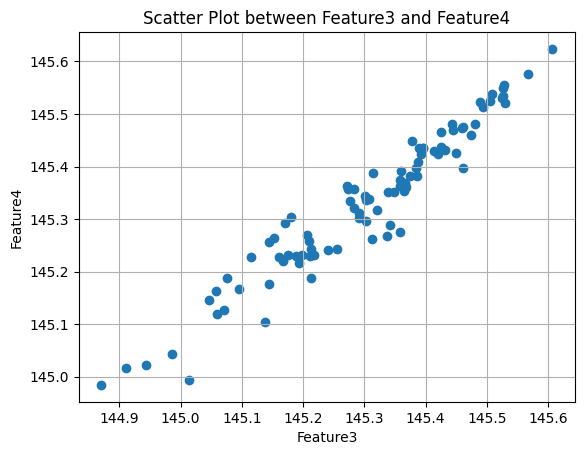

In [9]:
# Homework 1 Problem 4.3

for i in range(correlation_matrix.shape[0]):
  correlation_matrix.iloc[i, i] = 0
  
max_corr = correlation_matrix.abs().stack().idxmax()

plt.scatter(welding_df[max_corr[0]], welding_df[max_corr[1]])
plt.xlabel(max_corr[0])
plt.ylabel(max_corr[1])
plt.title(f'Scatter Plot between {max_corr[0]} and {max_corr[1]}')
plt.grid(True)
plt.show()

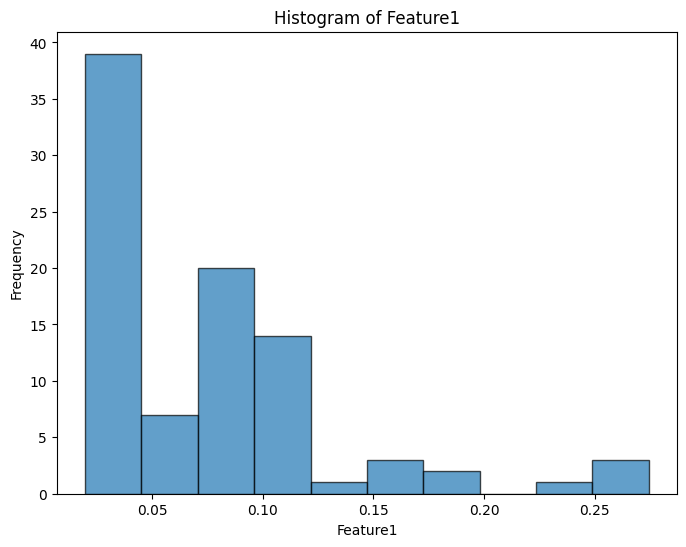

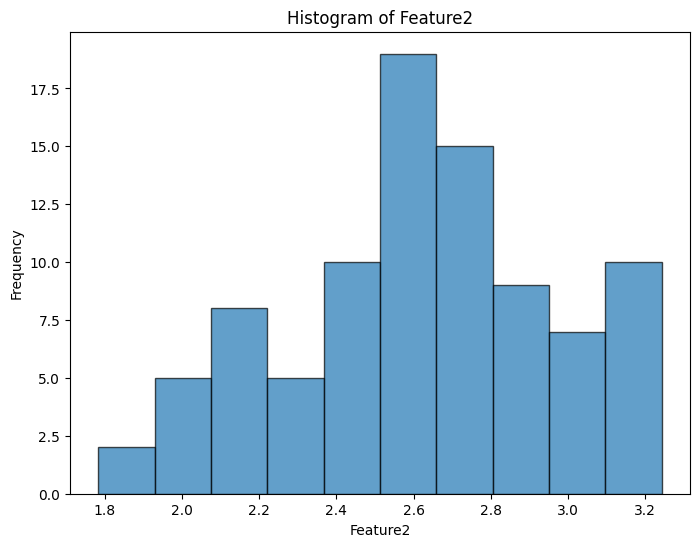

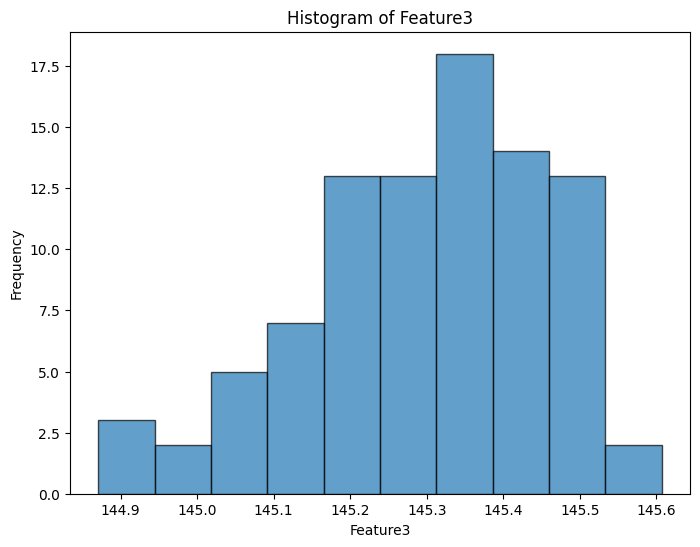

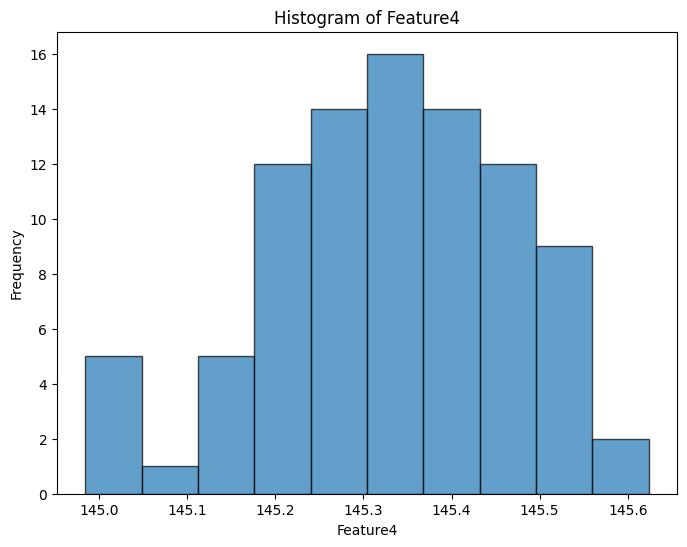

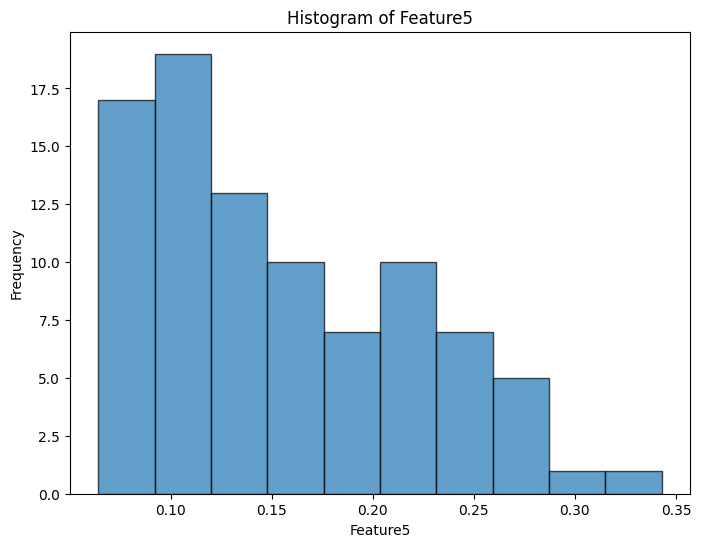

In [10]:
# Homework 1 Problem 4.4

features = welding_df.columns[1:]  # Exclude 'Configuration'

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(welding_df[feature], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

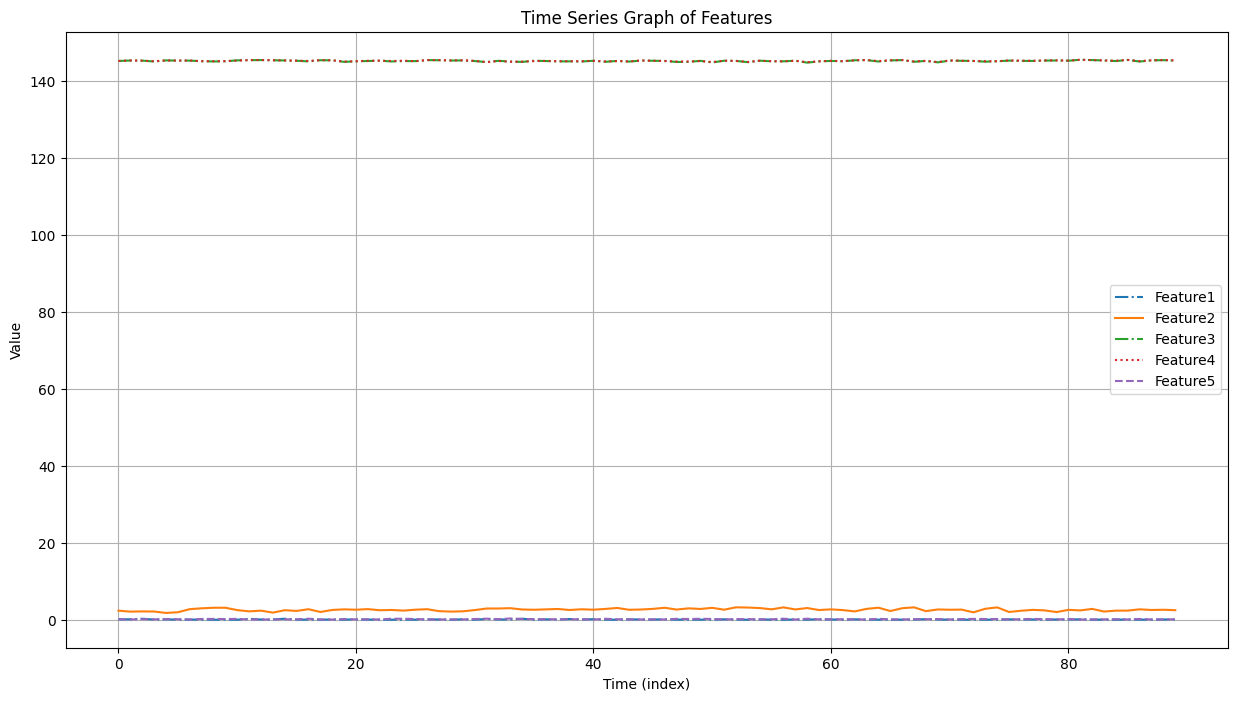

In [11]:
# Homework 1 Problem 4.6

line_styles = ['-.', '-', '-.', ':', '--']

plt.figure(figsize=(15, 8))
for idx, col in enumerate(welding_df.columns[1:]):
    plt.plot(welding_df[col], label=col, linestyle=line_styles[idx % len(line_styles)])

plt.title('Time Series Graph of Features')
plt.xlabel('Time (index)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Homework 1 Problem 4.7
grouped = welding_df.groupby('Configuration')

# Calculating the required statistics
means = grouped.mean()
medians = grouped.median()
ranges = grouped.max() - grouped.min()
variances = grouped.var()

print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nRanges:\n", ranges)
print("\nVariances:\n", variances)

Means:
                Feature1  Feature2    Feature3    Feature4  Feature5
Configuration                                                      
A              0.085621  2.840065  145.205932  145.229498  0.174264
B              0.065359  2.558013  145.348488  145.387444  0.146979
C              0.083660  2.440070  145.350483  145.377195  0.144863

Medians:
                Feature1  Feature2    Feature3    Feature4  Feature5
Configuration                                                      
A              0.078431  2.816144  145.211505  145.244762  0.152556
B              0.058824  2.566659  145.369614  145.411851  0.138284
C              0.058824  2.438155  145.384661  145.389595  0.115341

Ranges:
                Feature1  Feature2  Feature3  Feature4  Feature5
Configuration                                                  
A              0.254902  0.719455  0.521641  0.439903  0.265622
B              0.117647  1.298996  0.663448  0.601505  0.177834
C              0.254902  1.353925  

In [13]:
# Homework 1 Problem 4.8

from scipy.stats import ttest_ind

groupA = welding_df[welding_df['Configuration'] == 'A']
groupB = welding_df[welding_df['Configuration'] == 'B']
groupC = welding_df[welding_df['Configuration'] == 'C']

for col in welding_df.columns[1:]:
    t_stat_B, p_val_B = ttest_ind(groupA[col], groupB[col])
    t_stat_C, p_val_C = ttest_ind(groupA[col], groupC[col])
    
    print(f"Feature: {col}")
    if p_val_B < 0.05:
        print("B and A have statistically different means.")
    else:
        print("B and A might have the same mean.")
    
    if p_val_C < 0.05:
        print("C and A have statistically different means.")
    else:
        print("C and A might have the same mean.")
    print("----------------------")

Feature: Feature1
B and A might have the same mean.
C and A might have the same mean.
----------------------
Feature: Feature2
B and A have statistically different means.
C and A have statistically different means.
----------------------
Feature: Feature3
B and A have statistically different means.
C and A have statistically different means.
----------------------
Feature: Feature4
B and A have statistically different means.
C and A have statistically different means.
----------------------
Feature: Feature5
B and A might have the same mean.
C and A might have the same mean.
----------------------
